# DSCI 503 - Project 02
### Bernard Mwamburi

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt

## Part A: Stock Simulation Function
Creating and testing a function to randomly generate sequences of simulated daily stock prices, or runs.

In [2]:
def simulate_stock(start, rate, vol, days):
    daily_yields =  np.random.normal(loc=rate/252, scale=vol/(252**0.5), size=days)
    cumulative_yields = np.cumsum(daily_yields)
    daily_multipliers = np.exp(cumulative_yields)
    simulated_daily_prices = np.round(start * daily_multipliers, 2)
    
    return np.concatenate(([start], simulated_daily_prices))

Testing the simulate_stock() function.

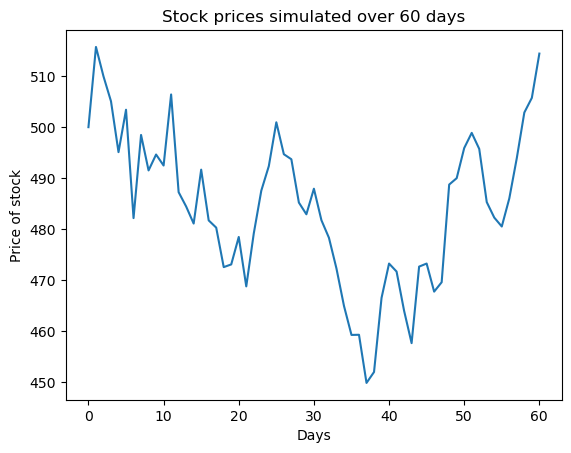

In [3]:
np.random.seed(1)

final = simulate_stock(start=500, rate=0.08, vol=0.3, days=60)
plt.plot(final)
plt.title("Stock prices simulated over 60 days")
plt.xlabel("Days")
plt.ylabel("Price of stock")

plt.show()

## Part B: Annual Yield Function
Create and test a function that takes a simulated run as input, and calculates the annual yield for that particular run.

In [4]:
np.random.seed(1)

def find_yield(run):
    start = run[0]
    final = run[-1]
    days = len(run) - 1
    annual_yield = round(math.log(final / start) * (252 / days), 4)
    
    return annual_yield

Testing the final_yield() function.

In [5]:
print(find_yield(simulate_stock(start=500, rate=0.08, vol=0.3, days=60)))

0.1196


Exploring the potential variability in our simulated runs by creating and plotting 25 simulated runs

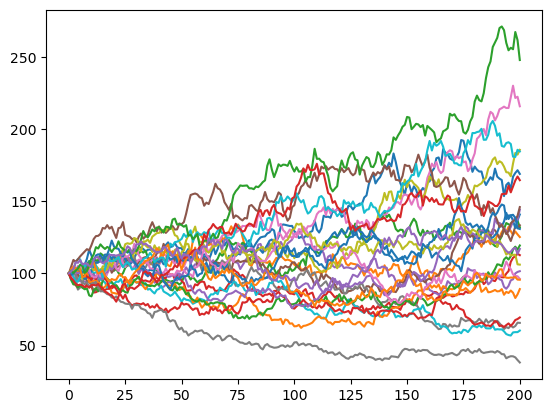

In [6]:
annual_yields = []
for i in range(1, 26):
    final = simulate_stock(start=100, rate=0.06, vol=0.4, days=200)
    annual_yields.append(find_yield(final))
    plt.plot(final)

Display the yields of the 25 runs

In [7]:
print(annual_yields)

[0.6611, 0.2836, 0.3501, 0.1506, 0.0198, 0.3635, 0.9697, -0.5283, 0.7798, -0.6351, 0.4319, -0.1446, 0.2234, -0.4586, 0.4608, 0.4768, -0.0479, -1.2092, 0.0748, 0.7724, 0.3386, -0.0558, 1.1441, 0.6283, 0.1978]


## Part C: Finding Seeds that Generate Specific Outcomes
Find seeds that result in specific outcomes through trial-and-error

In the cell below, Stock A has the highest simulated final pice.

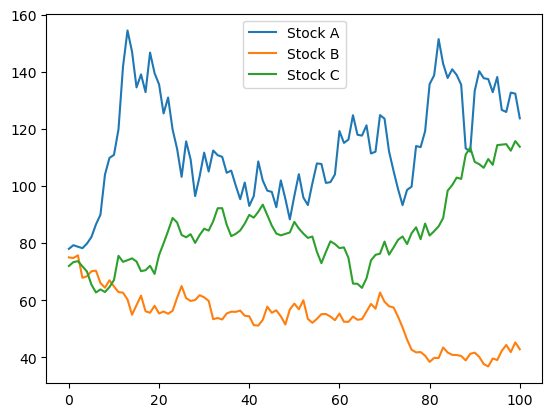

In [8]:
np.random.seed(567)
stock_A = simulate_stock(78, 0.04, 1.2, 100)
stock_B = simulate_stock(75, 0.08, 0.8, 100)
stock_C = simulate_stock(72, 0.16, 0.6, 100)
plt.plot(stock_A, label="Stock A")
plt.plot(stock_B, label="Stock B")
plt.plot(stock_C, label="Stock C")
plt.legend()

In the cell below, Stock B has the highest simulated final price.

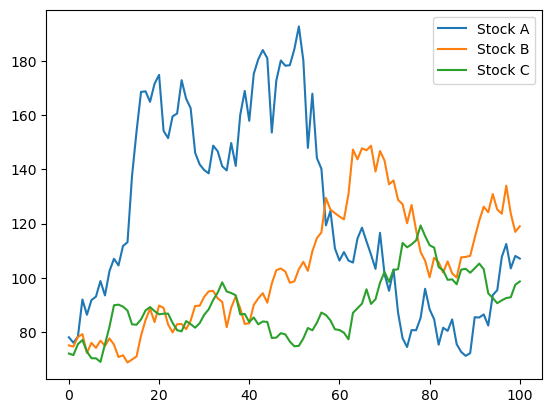

In [9]:
np.random.seed(203)
stock_A = simulate_stock(78, 0.04, 1.2, 100)
stock_B = simulate_stock(75, 0.08, 0.8, 100)
stock_C = simulate_stock(72, 0.16, 0.6, 100)
plt.plot(stock_A, label="Stock A")
plt.plot(stock_B, label="Stock B")
plt.plot(stock_C, label="Stock C")
plt.legend()

In the cell below, Stock C has the highest simulated final price.

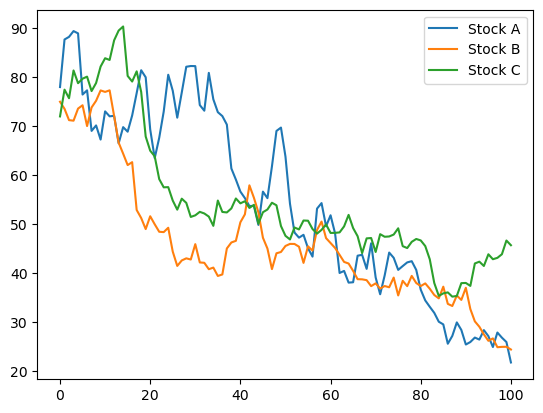

In [10]:
np.random.seed(14)
stock_A = simulate_stock(78, 0.04, 1.2, 100)
stock_B = simulate_stock(75, 0.08, 0.8, 100)
stock_C = simulate_stock(72, 0.16, 0.6, 100)
plt.plot(stock_A, label="Stock A")
plt.plot(stock_B, label="Stock B")
plt.plot(stock_C, label="Stock C")
plt.legend()

## Part D: Monte Carlo Simulation

Perform Monte Carlo Simulation, a process of performing several simulations to estimate probabilities relating to the outcome of a certain event.
This shows a use-case of simulations.

In [11]:
def monte_carlo(start, rate, vol, days, num_runs):
    final_prices = []
    annual_yields = []
   
    for _ in range(num_runs):
        daily_returns = np.random.normal(rate / 252, vol / np.sqrt(252), days)
        price_matrix = start * np.exp(np.cumsum(daily_returns))
       
        final_price = price_matrix[-1]
        annual_yield = (final_price / start) ** (252 / days) - 1
       
        final_prices.append(final_price)
        annual_yields.append(annual_yield)
   
    return np.array(final_prices), np.array(annual_yields)



Test the monte_carlo() function by running a Monte carlo simulation with a specific seed.

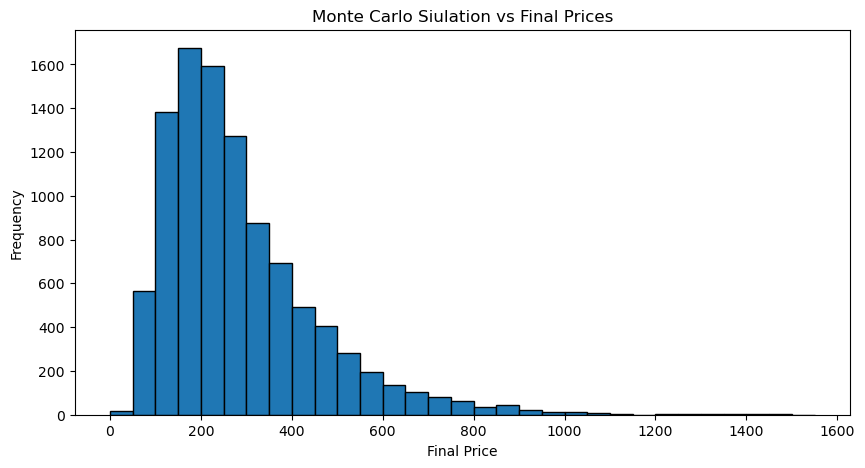

In [12]:
np.random.seed(1)
final_prices, _ = monte_carlo(200, 0.10, 0.4, 500, 10000)

plt.figure(figsize=(10, 5))
plt.hist(final_prices, bins=np.arange(0, 1600, 50), edgecolor='black')
plt.title("Monte Carlo Siulation vs Final Prices")
plt.xlabel("Final Price")
plt.ylabel("Frequency")
plt.show()

Display 10th, 25th, 50th, 75th, and 90th percentiles of the simulated prices

In [13]:
for i in [10, 25, 50, 75, 90]:
    value = np.percentile(final_prices, i)
    print(f"{i}th percentile: {value:.2f}")

10th percentile: 118.05
25th percentile: 165.57
50th percentile: 242.95
75th percentile: 357.56
90th percentile: 505.91


## Part E: Effects of Volatility 
Exploring the effect of volatility on simulated stock prices using two Monte Carlo simulations.

In [14]:
np.random.seed(1)

final_prices_a, annual_yields_a = monte_carlo(100, 0.12, 0.3, 150, 10000)
final_prices_b, annual_yields_b = monte_carlo(100, 0.12, 0.7, 150, 10000)

average_annual_yield_a = round(np.mean(annual_yields_a), 4)
average_annual_yield_b = round(np.mean(annual_yields_b), 4)

print(f'''
Average Annual Yield for A over 10000 runs: {average_annual_yield_a}
Average Annual Yield for B over 10000 runs: {average_annual_yield_b}
''')


Average Annual Yield for A over 10000 runs: 0.2178
Average Annual Yield for B over 10000 runs: 0.6894



Text(0.5, 0.98, 'Histogram of Final Prices over 10,000 Runs')

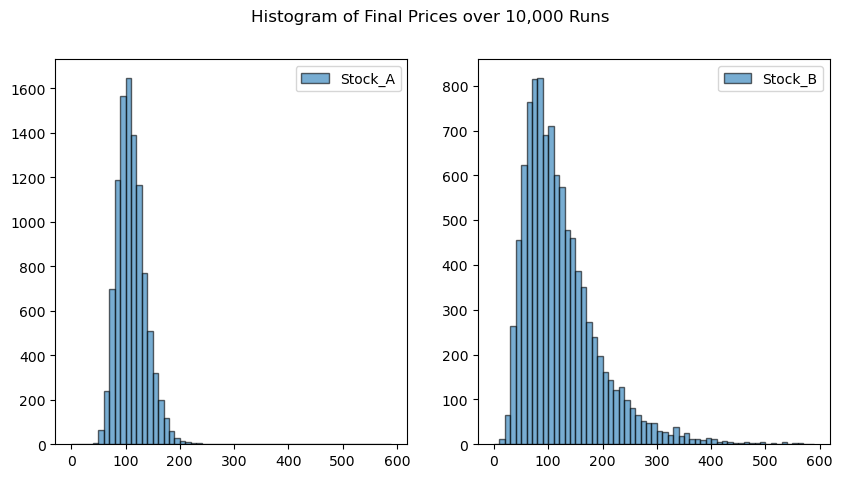

In [15]:
plt.figure(figsize=[10, 5])

plt.subplot(1, 2, 1)
plt.hist(final_prices_a, edgecolor='black', bins=np.arange(0, 600, 10), alpha=0.6, label='Stock_A')
plt.legend()

plt.subplot(1, 2, 2)
plt.hist(final_prices_b, edgecolor='black', bins=np.arange(0, 600, 10), alpha=0.6, label='Stock_B')
plt.legend()

plt.suptitle("Histogram of Final Prices over 10,000 Runs")

## Part F: Comparing Two Stocks
We will use Monte Carlo simulation to estimate probabilities relating to the performance of 2 stocks with different parameters.

In [16]:
np.random.seed(1)
final_prices_A, yields_stock_A = monte_carlo(120, 0.08, 0.2, 252, 10000)
final_prices_B, yields_stock_B = monte_carlo(120, 0.05, 0.5, 252, 10000)

a_above_b = np.mean(final_prices_A > final_prices_B)
a_above_150 = np.mean(final_prices_A > 150)
b_above_150 = np.mean(final_prices_B > 150)
a_below_100 = np.mean(final_prices_A < 100)
b_below_100 = np.mean(final_prices_B < 100)

print(f'''
Proportions of runs which...
----------------------------
A ends above B:   {a_above_b:.4f}

A ends above 150: {a_above_150:.4f}
B ends above 150: {b_above_150:.4f}

A ends below 100: {a_below_100:.4f}
B ends below 100: {b_below_100:.4f}
''')


Proportions of runs which...
----------------------------
A ends above B:   0.5206

A ends above 150: 0.2338
B ends above 150: 0.3620

A ends below 100: 0.0951
B ends below 100: 0.3195



## Part G: Expected Call Payoff
Use Monte Carlo to estimate the expected payoff of a call on a particular stock.
A *call option* is a type of investment whose final value (*payoff*) is based on the price of a stock.

In [17]:
np.random.seed(1)

final_stock_prices, _ = monte_carlo(200, 0.11, 0.4, 150, 10000)
final_stock_prices -= 225
payoff = np.where(final_stock_prices < 0, 0, final_stock_prices)

print(np.mean(payoff))

27.097679809419997
